# Expectation Maximization Applied to the Old Faithful Dataset

In [1]:
import scipy.io
import numpy 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import numpy as atle
import seaborn
from scipy.stats import multivariate_normal
%matplotlib inline  


/Users/jacobbrewer/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/jacobbrewer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
matlabData = scipy.io.loadmat('old_faithful.mat')
data = matlabData['data']
data = data - np.mean( data, axis=0, keepdims=True )

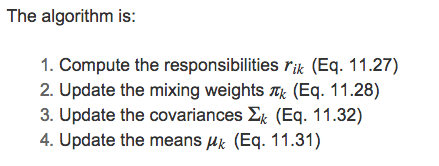

In [3]:
#Subset of Regressors Equation 
from IPython.display import Image
Image(filename='main-algorithm.png')

In [4]:
# ------------ INITIALIZE PARAMETERS ------------ #
# the Gaussian means (as column vectors -- ie, the mean for Gaussian 0 is mus[:,0]
mus = np.asarray( [[-1.17288986, -0.11642103],
                   [-0.16526981,  0.70142713]])
 
# the Gaussian covariance matrices
covs = list()
covs.append( 
    np.asarray([[ 0.74072815,  0.09252716],
                [ 0.09252716,  0.5966275 ]]) )
covs.append( 
    np.asarray([[ 0.39312776, -0.46488887],
                [-0.46488887,  1.64990767]]) )
 
# The Gaussian mixing weights
mws = [ 0.68618439, 0.31381561 ]  # called alpha in the slides

Wiks = np.zeros((len(data), 2))
# ------------ INITIALIZATION COMPLETE ------------ #

In [ ]:
# STEP 1  ---> RESPONSIBILITIES
def updateResponsibilities():
    for i in range(0,len(data),1):
        Wiks[i,0] = multivariate_normal.pdf(data[i,:].T, mean=mus[:,0], cov=np.atleast_2d(covs[0])) * mws[0]
        Wiks[i,1] = multivariate_normal.pdf(data[i,:].T, mean=mus[:,1], cov=np.atleast_2d(covs[1])) * mws[1]
        summed = ((Wiks[i,0] * mws[0]) + (Wiks[i,1] * mws[1]) )
        normed1 = (Wiks[i,0] / summed)
        normed2 = (Wiks[i,1] / summed)
        Wiks[i,0] = normed1
        Wiks[i,1] = normed2

In [ ]:
# STEP 2  ---> MIXING WEIGHTS
def updateMixingWeights(): 
    N0 = 0
    N1 = 0
    for index in range (0, len(data), 1):
        N0 += Wiks[index][0]
        N1 += Wiks[index][1]

    mw0 = (N0 / len(data))
    mw1 = (N1 / len(data))
    mws[0] = mw0
    mws[1] = mw1

In [ ]:
# STEP 3  ---> COVARIANCE MATRIX
def updateCovariance(): 
    
    N0 = 0
    N1 = 0
    for index in range (0, len(data), 1):
        N0 += Wiks[index][0]
        N1 += Wiks[index][1]
    
    covariance0 = np.zeros((2, 2))
    covariance1 = np.zeros((2, 2))
    for i in range (0, len(data), 1):
        #Covariance 0
        xMinusMu = np.atleast_2d(data[i] - mus[:,0]) # NB !!! ???
        xMinusMuTranspose = xMinusMu.T  #np.transpose(xMinusMu)
        val = Wiks[i][0] * xMinusMuTranspose.dot( xMinusMu)
        covariance0 += val

        #Covariance 1
        xMinusMu = np.atleast_2d(data[i] - mus[:,1]) # NB !!! ???
        xMinusMuTranspose = xMinusMu.T  #np.transpose(xMinusMu)
        val = Wiks[i][1] * xMinusMuTranspose.dot( xMinusMu)
        covariance1 += val
    covariance0 = covariance0 / N0
    covariance1 = covariance1 / N1
    covs[0] = covariance0
    covs[1] = covariance1

In [ ]:
# STEP 4  ---> MEANS
def updateMeans(): 
    
    N0 = 0
    N1 = 0
    for index in range (0, len(data), 1):
        N0 += Wiks[index][0]
        N1 += Wiks[index][1]
 
    WikXi0 = 0
    WikXi1 = 1

    #print Wiks
    #THIS NEEDS TO BE DOUBLE CHECKED
    for index in range (0,len(data), 1):
        WikXi0 += Wiks[index][0] * data[index]
        WikXi1 += Wiks[index][1] * data[index]

    mu0 = (1/N0) * WikXi0
    mu1 = (1/N1) * WikXi1

    mus[:,0] = mu0 # mus[:,0] = mu0
    mus[:,1] = mu1 # mus[:,1] = mu1

array([[-1.94903883, -1.99571842, -2.03436196, -2.06481384, -2.08695144,
        -2.10068563, -2.10596109, -2.1027566 , -2.09108505, -2.07099343,
        -2.04256265, -2.0059072 , -1.96117467, -1.90854517, -1.84823064,
        -1.78047394, -1.7055479 , -1.62375422, -1.53542225, -1.44090768,
        -1.34059108, -1.2348764 , -1.1241893 , -1.00897549, -0.88969889,
        -0.76683979, -0.6408929 , -0.51236535, -0.38177469, -0.24964676,
        -0.11651359,  0.01708873,  0.15062225,  0.28354927,  0.41533453,
         0.54544739,  0.67336392,  0.79856906,  0.92055864,  1.03884145,
         1.15294122,  1.26239849,  1.36677254,  1.46564308,  1.55861198,
         1.64530491,  1.72537278,  1.79849317,  1.86437167,  1.92274301,
         1.97337213,  2.01605519,  2.0506203 ,  2.07692828,  2.09487321,
         2.10438283,  2.10541884,  2.09797706,  2.08208748,  2.05781406,
         2.02525456,  1.98454007,  1.93583453,  1.87933407,  1.8152662 ,
         1.74388889,  1.66548956,  1.58038389,  1.4

In [33]:
def graphClusters(): 
    shifted0XVals = []
    shifted0YVals = []
    shifted1XVals = []
    shifted1YVals = []
    
    cov0X, cov0Y = cov_to_pts(covs[0])
    cov1X, cov1Y = cov_to_pts(covs[1])
    for i in range(0, len(cov0X),1):
        shifted0XVals.append(cov0X[i]   + mus[0][0])
        shifted0YVals.append(cov0Y[i]   + mus[1][0])
        shifted1XVals.append(cov1X[i]   + mus[0][1])
        shifted1YVals.append(cov1Y[i]   + mus[1][1])
    
    
    cluster0Points = []
    cluster1Points = []
    #clasify points
    for i in range (0, len(data), 1):
        #print data[i]
        if Wiks[i][0] > Wiks[i][1]:
            cluster0Points.append(data[i])
        else: 
            cluster1Points.append(data[i])
            
    cluster0X = np.zeros(len(cluster0Points))
    cluster0Y = np.zeros(len(cluster0Points))
    
    for i in range (0, len(cluster0Points), 1):
        cluster0X[i] = cluster0Points[i][0]
        cluster0Y[i] = cluster0Points[i][1]
    
    cluster1X = np.zeros(len(cluster1Points))
    cluster1Y = np.zeros(len(cluster1Points))
    for i in range (0, len(cluster1Points), 1):
        cluster1X[i] = cluster1Points[i][0]
        cluster1Y[i] = cluster1Points[i][1]
        
    #print Mus
    # color=map(str, normalized_responsibilities[:,0])
    #plt.scatter(mus[0][0], mus[1][0], s=120, color=map(str, normalized_responsibilities[:,0]))
    #plt.scatter(mus[0][1], mus[1][1], s=120, color=map(str, normalized_responsibilities[:,0]))
    
           
    #print "CLUSTER 0: ", len(cluster0X)  
    #print "CLUSTER 1: ", len(cluster1X)
    print "Mu 0     : ", mus[0][0], mus[1][0]
    print "Mu 1     : ", mus[0][1], mus[1][1]
    
    allXVals = []
    allYVals = []
    responsibilitiesForPlotting = []
    for i in range(0,len(data),1):
        allXVals.append(data[i][0])
        allYVals.append(data[i][1])
        normalized = Wiks[i][0] / (Wiks[i][0] + Wiks[i][1])
        responsibilitiesForPlotting.append(normalized)
     
    #Plot Points
    #plt.scatter(cluster0X,cluster0Y, c='white')
    #plt.scatter(cluster1X,cluster1Y, c='black')
    plt.scatter(allXVals,allYVals, 
                color=map(str, responsibilitiesForPlotting), edgecolors='black')
    
    
    #Plot Elipse   
    plt.plot(shifted0XVals, shifted0YVals, c='blue', label='Class 0')
    plt.plot(shifted1XVals, shifted1YVals, c='green', label='Class 1')
    
    #Means
    plt.scatter(mus[0][0], mus[1][0], s=120, c='white')
    plt.scatter(mus[0][1], mus[1][1], s=120, c='black')
    plt.legend(loc=4, fontsize='xx-large')
    plt.show()
    
    

In [34]:
def cluster(): 
    updateResponsibilities()
    updateMixingWeights()
    updateCovariance()
    updateMeans()
    graphClusters()

In [6]:
def cov_to_pts( cov ):
    circ = np.linspace( 0, 2*np.pi, 100 )
    sf = np.asarray( [ np.cos( circ ), np.sin( circ ) ] )
    [u,s,v] = np.linalg.svd( cov )
    pmat = u*2.447*np.sqrt(s) # 95% confidence
    return np.dot(  pmat, sf )

Iteration:  0
Mu 0     :  -0.256226494321 -1.95872165373
Mu 1     :  0.018760451026 0.1352237511


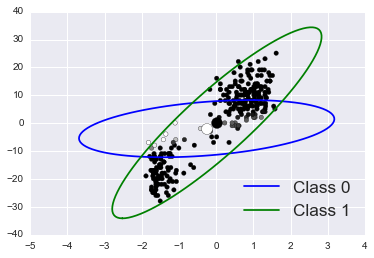

Iteration:  1
Mu 0     :  -0.202250971535 -1.43795590293
Mu 1     :  0.0110807414012 0.0117499133812


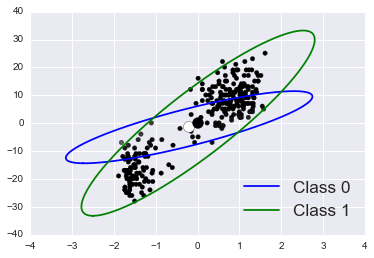

Iteration:  2
Mu 0     :  0.000967231780298 -0.561536496488
Mu 1     :  0.00123206957172 0.00139973397719


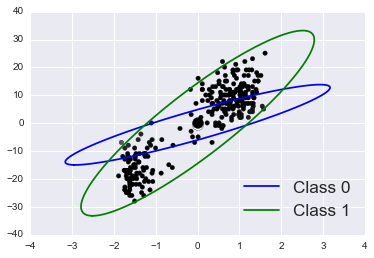

Iteration:  3
Mu 0     :  0.261879799923 0.524218280352
Mu 1     :  0.0108827624333 0.0107936983961


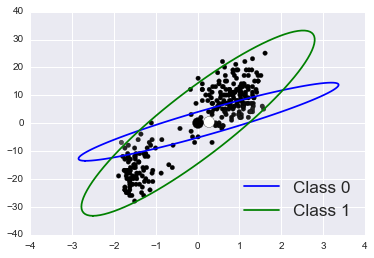

Iteration:  4
Mu 0     :  0.483150469151 1.40258396273
Mu 1     :  0.00100119943558 0.000560979255734


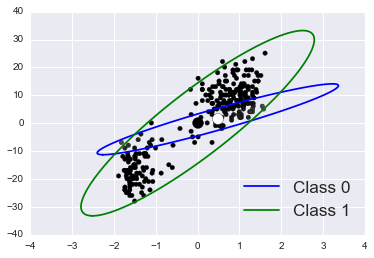

Iteration:  5
Mu 0     :  0.753515864963 2.41893395952
Mu 1     :  0.0103653274103 0.00901717394119


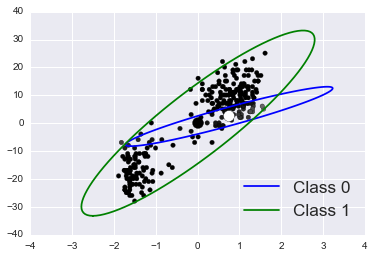

Iteration:  6
Mu 0     :  1.01131427651 3.33700998597
Mu 1     :  -0.00053016249949 -0.00458643080586


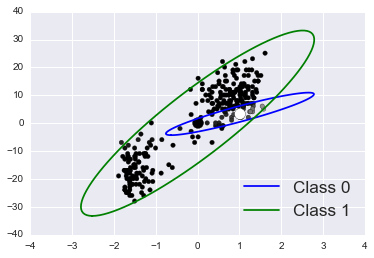

Iteration:  7
Mu 0     :  1.17443906782 3.86880974636
Mu 1     :  0.0040734279075 -0.0118655333737


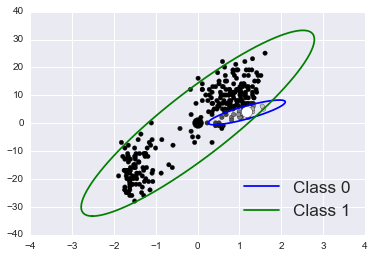

Iteration:  8
Mu 0     :  1.1810980196 3.82029253188
Mu 1     :  -0.0317503856983 -0.105514530234


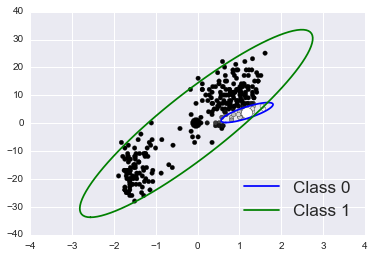

Iteration:  9
Mu 0     :  1.14812273238 3.65107316331
Mu 1     :  -0.0533906285322 -0.194474589505


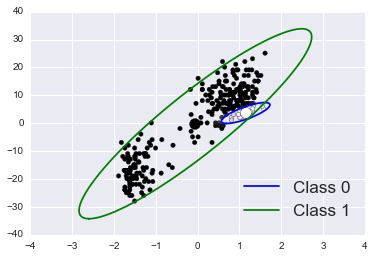

Iteration:  10
Mu 0     :  1.14565445264 3.66119730249
Mu 1     :  -0.0658989678426 -0.213369092548


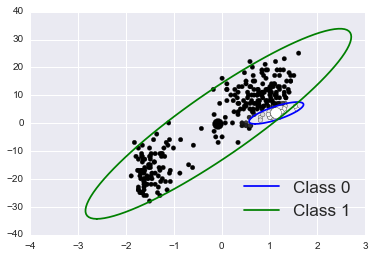

Iteration:  11
Mu 0     :  1.13967572351 3.72742213175
Mu 1     :  -0.0624564426987 -0.230136015841


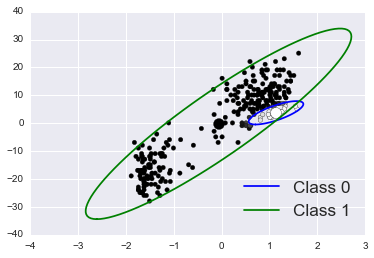

Iteration:  12
Mu 0     :  1.13893908122 3.88067336403
Mu 1     :  -0.0769873790649 -0.265369323008


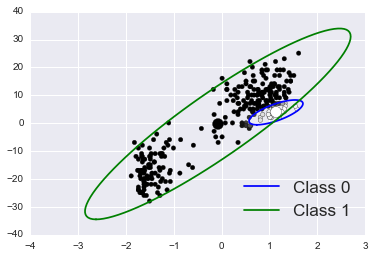

Iteration:  13
Mu 0     :  1.13485409585 4.13583231416
Mu 1     :  -0.078167944052 -0.31528764978


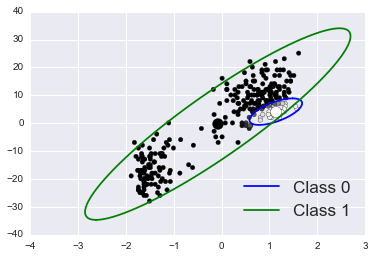

Iteration:  14
Mu 0     :  1.1294505337 4.4909877459
Mu 1     :  -0.102783780212 -0.412514837881


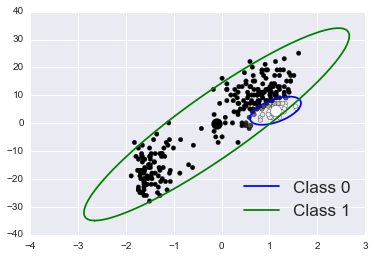

Iteration:  15
Mu 0     :  1.11847466095 4.92798032279
Mu 1     :  -0.11458193687 -0.544765735812


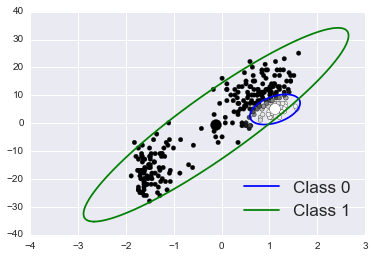

Iteration:  16
Mu 0     :  1.10231980489 5.41807677764
Mu 1     :  -0.153632396457 -0.760277371937


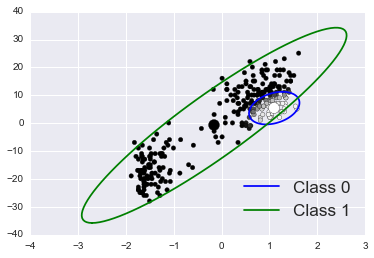

Iteration:  17
Mu 0     :  1.08257442435 5.92998973207
Mu 1     :  -0.180634260349 -1.04366020343


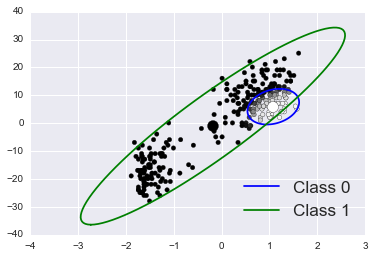

Iteration:  18
Mu 0     :  1.0600841809 6.4920183663
Mu 1     :  -0.238357578391 -1.46673101465


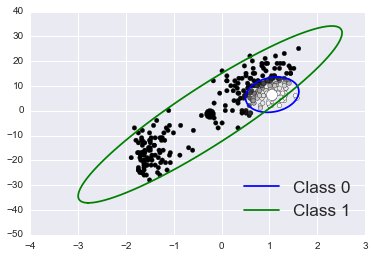

Iteration:  19
Mu 0     :  1.03619531536 7.12811890136
Mu 1     :  -0.291864233233 -2.08287981161


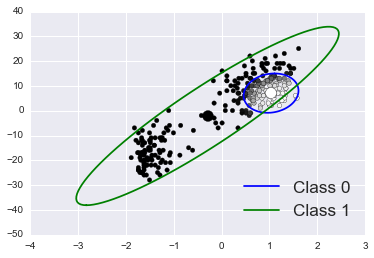

Iteration:  20
Mu 0     :  1.01287343469 7.73280749393
Mu 1     :  -0.385866609175 -2.95561178421


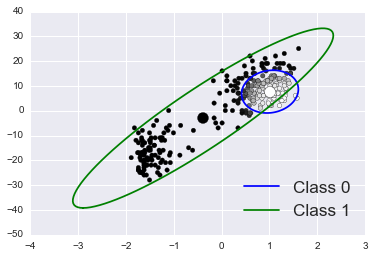

Iteration:  21
Mu 0     :  0.993562080743 8.16874337176
Mu 1     :  -0.458031418039 -3.86420606705


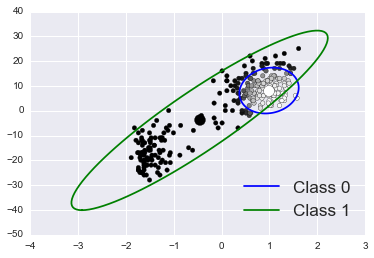

Iteration:  22
Mu 0     :  0.976866657191 8.49254376379
Mu 1     :  -0.550437800614 -4.79725947146


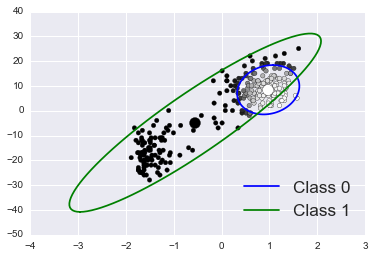

Iteration:  23
Mu 0     :  0.962633257515 8.74589941351
Mu 1     :  -0.621136944889 -5.76016745382


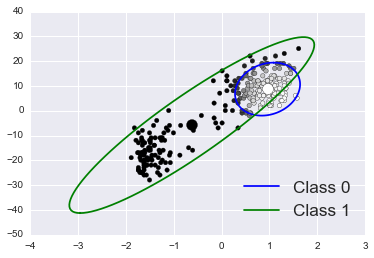

Iteration:  24
Mu 0     :  0.948909361274 8.98258022401
Mu 1     :  -0.723560931206 -6.86334770019


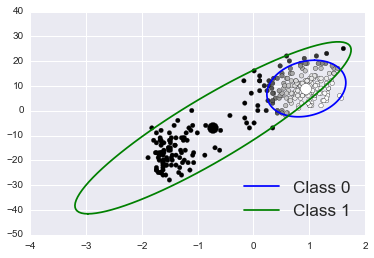

Iteration:  25
Mu 0     :  0.936229657403 9.17363627063
Mu 1     :  -0.802921188447 -8.0025335734


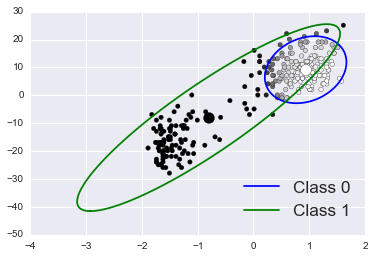

Iteration:  26
Mu 0     :  0.923535152174 9.34475625374
Mu 1     :  -0.909208295696 -9.21573231578


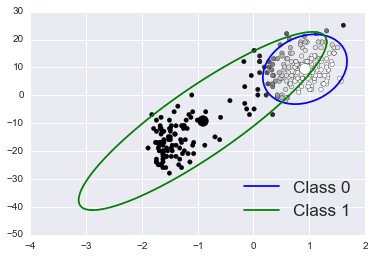

Iteration:  27
Mu 0     :  0.911316848787 9.47221376739
Mu 1     :  -0.988529120232 -10.4274589272


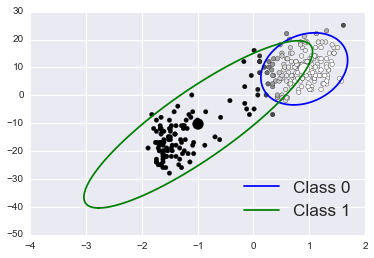

Iteration:  28
Mu 0     :  0.897994131491 9.57773724347
Mu 1     :  -1.09993387625 -11.7494644624


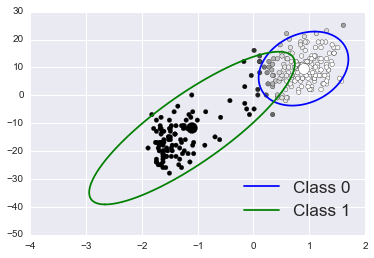

Iteration:  29
Mu 0     :  0.88135383782 9.61472452856
Mu 1     :  -1.18477206689 -13.0957025342


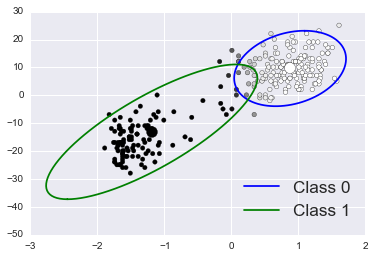

Iteration:  30
Mu 0     :  0.859832546768 9.58097730534
Mu 1     :  -1.29286349439 -14.4260827753


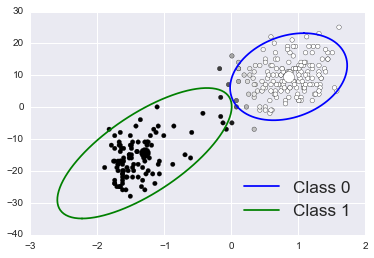

Iteration:  31
Mu 0     :  0.837946627744 9.47960038706
Mu 1     :  -1.34914501485 -15.4496092559


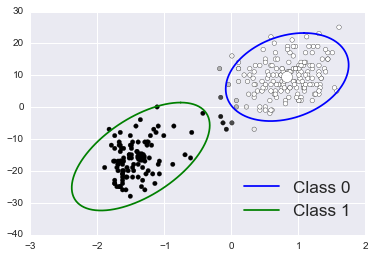

Iteration:  32
Mu 0     :  0.820402049222 9.30039599919
Mu 1     :  -1.41160795281 -16.02353083


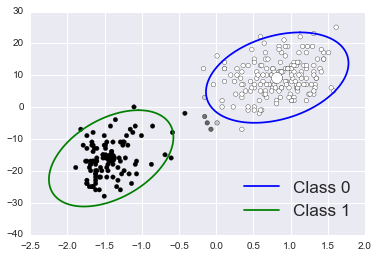

Iteration:  33
Mu 0     :  0.808051115704 9.13612590612
Mu 1     :  -1.42352427336 -16.2858700525


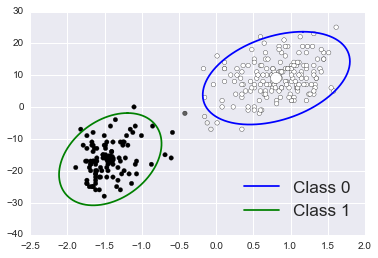

Iteration:  34
Mu 0     :  0.803513677498 9.08977734131
Mu 1     :  -1.44735959717 -16.3943988929


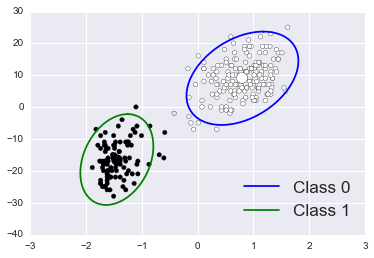

Iteration:  35
Mu 0     :  0.802368983657 9.07692707882
Mu 1     :  -1.43227395548 -16.3942168399


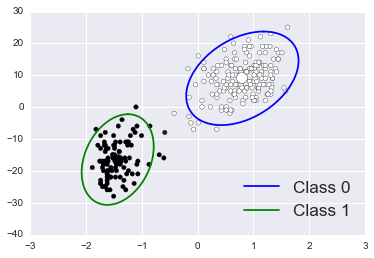

Iteration:  36
Mu 0     :  0.802274492844 9.07582909582
Mu 1     :  -1.44889540525 -16.4119021237


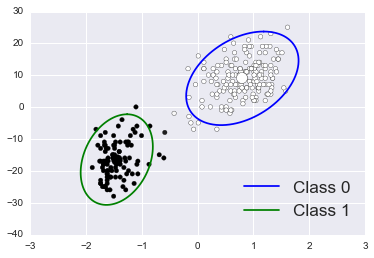

Iteration:  37
Mu 0     :  0.80206451751 9.07329963547
Mu 1     :  -1.43261945837 -16.3978469303


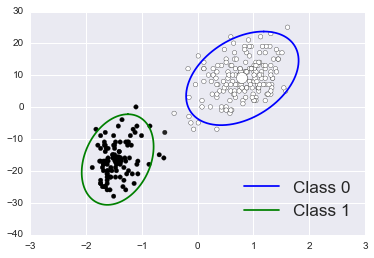

Iteration:  38
Mu 0     :  0.802209679036 9.07505586245
Mu 1     :  -1.44897006867 -16.4126703454


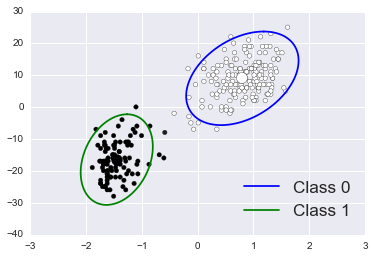

Iteration:  39
Mu 0     :  0.802049863326 9.07312342036
Mu 1     :  -1.43263225439 -16.3980130628


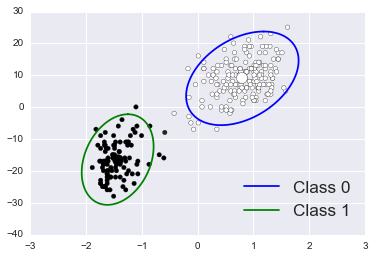

Iteration:  40
Mu 0     :  0.802205765179 9.07500911808
Mu 1     :  -1.44897495323 -16.4127168099


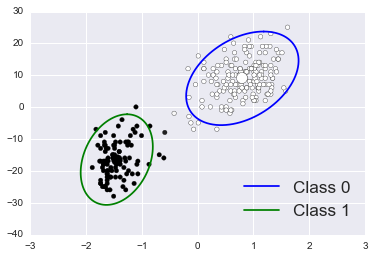

Iteration:  41
Mu 0     :  0.802049868497 9.07312344931
Mu 1     :  -1.43262844869 -16.3980092539


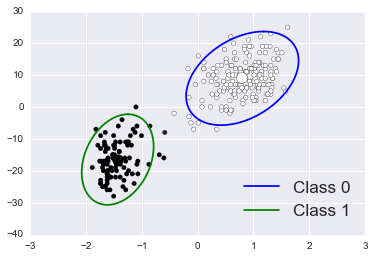

Iteration:  42
Mu 0     :  0.80220495271 9.07499944235
Mu 1     :  -1.44897628878 -16.4127267377


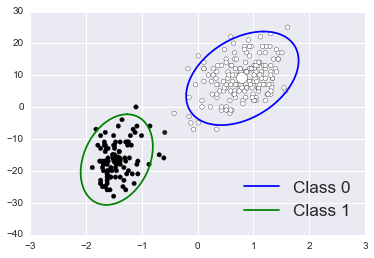

Iteration:  43
Mu 0     :  0.802050611754 9.07313235533
Mu 1     :  -1.43262383947 -16.3979969295


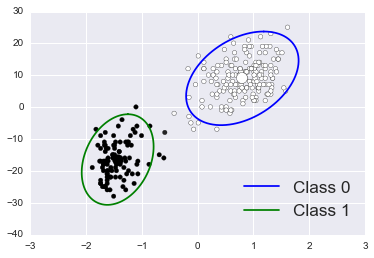

Iteration:  44
Mu 0     :  0.802204303357 9.07499171601
Mu 1     :  -1.4489774341 -16.4127347409


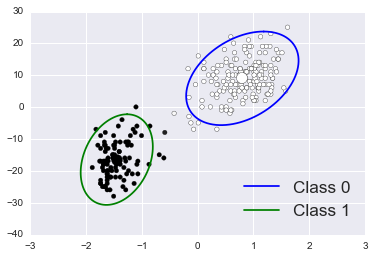

Iteration:  45
Mu 0     :  0.802051385544 9.07314162871
Mu 1     :  -1.43261922904 -16.3979842837


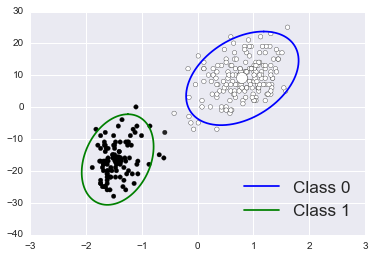

Iteration:  46
Mu 0     :  0.802203667628 9.0749841521
Mu 1     :  -1.44897856007 -16.41274258


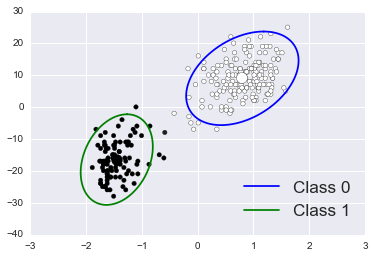

Iteration:  47
Mu 0     :  0.802052153958 9.07315083758
Mu 1     :  -1.43261465784 -16.3979717324


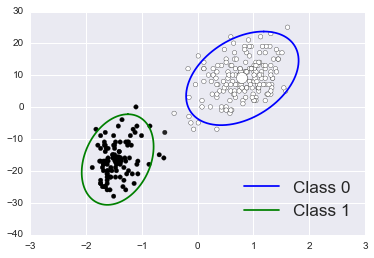

Iteration:  48
Mu 0     :  0.802203037875 9.07497665919
Mu 1     :  -1.44897967549 -16.4127503448


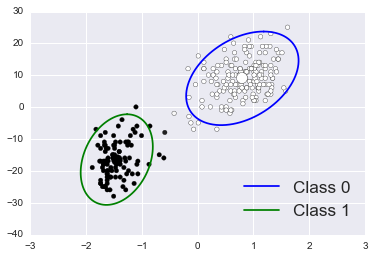

Iteration:  49
Mu 0     :  0.802052915237 9.07315996079
Mu 1     :  -1.43261012757 -16.3979592956


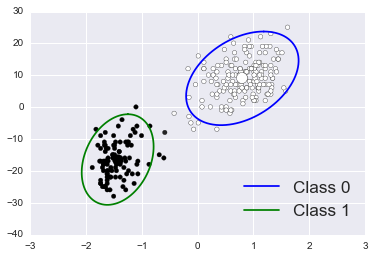

In [36]:
for count in range(0,50,1):
    print 'Iteration: ', count
    cluster()

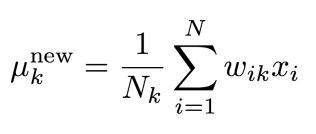

In [13]:
Image(filename='mus.png')

# Compute Responsibilities

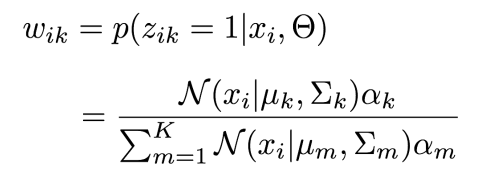

In [15]:
#to calculate everything within the conditional gaussian in the equation below, we will use this library: 
    # scipy.stats.multivariate_normal.pdf
Image(filename='responsibilities.png')

#Update Mixing Weights (pi / alpha / mws)

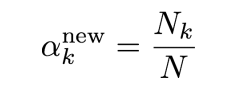

In [16]:
Image(filename='mixing-weights.png')

#Update Means (mus)